#### Sales Analysis 

Sales analysis using Python Pandas & Python Matplotlib to analyze and answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc. 

Project Inspo: [Youtube](youtube.com/watch?v=eMOA1pPVUc4)

Data Source: [Keith's Github](https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis)

PS: In my projects, whenever I get an error or make mistakes, I leave them and show how i go about correcting them. so if you're following or reading through, keep that in mind.

In [1]:
import pandas as pd
import glob

###### Merging the data set

Since our data is a 12 months worth of sales data in different files we will merge them into a single file.

In [2]:
# Lets see what a months data looks like

df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
import pandas as pd
import os

# Set the directory where the CSV files are located
directory = './Sales_Data/'

# Get a list of all CSV files in the directory
files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Create an empty dataframe to store the concatenated data
all_data = pd.DataFrame()

# Loop through each CSV file and concatenate the data
for file in files:
    filepath = os.path.join(directory, file)
    df = pd.read_csv(filepath)
    all_data = pd.concat([all_data, df])

# Write the concatenated data to a new CSV file
all_data.to_csv('./Sales_Data/all_data.csv', index=False)


In this code, we first set the directory where the CSV files are located and use os.listdir() to get a list of all CSV files in the directory. We then create an empty dataframe all_data to store the concatenated data.

Next, we loop through each CSV file, read it into a pandas dataframe using pd.read_csv(), and concatenate it with the all_data dataframe using pd.concat(). Finally, we write the concatenated data to a new CSV file using to_csv(). Note that we set index=False to exclude the index column from the output file.

After running this code, you should have a new CSV file called all_data.csv in the Sales_Data directory, which contains the concatenated data from all the original CSV files.

In [4]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Alternatively

In [5]:
import os
import pandas as pd

# get list of all CSV files in directory
files = [file for file in os.listdir('./Sales_Data') if file.endswith('.csv')]

# concatenate all CSV files into one dataframe
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

# print first 5 rows of resulting dataframe
print(all_months_data.head())


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [6]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning The Data

First step is to figure out what we need to clean.

From the snip of the data above, we can see that there are null values in our data set, lets start from there.

###### Drop NAN rows

In [7]:
all_data.isnull().sum()

Order ID            2725
Product             2725
Quantity Ordered    2725
Price Each          2725
Order Date          2725
Purchase Address    2725
dtype: int64

In [8]:
# drop them

all_data.dropna(inplace = True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
all_data['Order Date']

0        04/19/19 08:46
2        04/07/19 22:30
3        04/12/19 14:38
4        04/12/19 14:38
5        04/30/19 09:27
              ...      
11681    09/17/19 20:56
11682    09/01/19 16:00
11683    09/23/19 07:39
11684    09/19/19 17:30
11685    09/30/19 00:18
Name: Order Date, Length: 931525, dtype: object

In [10]:
# Get rid of strings in Order data column

all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Change Column Type

In [11]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [12]:
# Change the datatypes of Quantity ordered and price each to Numeric

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

Got a warning message because the code above is  using chained indexing to modify the DataFrame. Chained indexing is when you use multiple indexing operations in a single line of code.
This can lead to unexpected results and is not recommended. Instead, you should use .loc or .iloc to modify the DataFrame

In [13]:
all_data.loc[:, 'Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data.loc[:, 'Price Each'] = pd.to_numeric(all_data['Price Each'])

The SettingWithCopyWarning is a warning message in Pandas that suggests that the code is trying to modify a copy of a DataFrame instead of the original DataFrame, which could lead to unpredictable results. To avoid this warning, you can use the .loc method instead of chained indexing.

In [14]:
all_data.loc[:, 'Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data.loc[:, 'Price Each'] = pd.to_numeric(all_data['Price Each'])

In [15]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### Creating additional Columns to Augument our Data


In [16]:
# adding a month column
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.insert(1, 'Month', all_data['Order Date'].dt.month)
all_data.head()

,Order ID,Month,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,4,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,4,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,4,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,4,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,4,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [17]:
# Adding a City Column

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Month,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,4,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,4,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,4,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,4,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,4,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


The code above creates two new columns in the all_data dataframe: City and State. These columns are derived from the Purchase Address column.

The get_city function is defined to extract the city name from the Purchase Address column. It does this by splitting the string by comma (,) and taking the second element of the resulting list, which is assumed to be the city name. The .strip(" ") method is called on the resulting string to remove any leading or trailing whitespace.

The get_state function is defined to extract the state abbreviation from the Purchase Address column. It does this by splitting the string by comma (,) and taking the third element of the resulting list. This element is assumed to contain both the state abbreviation and the zip code. The string is split again by whitespace and the second element of the resulting list is taken, which is assumed to be the state abbreviation.

The apply method is called on the Purchase Address column of the all_data dataframe to apply these functions element-wise. The resulting series is then concatenated with a string that separates the city and state abbreviation with a space and encloses the state abbreviation in parentheses. The resulting series is assigned to the City column of the all_data dataframe.

### Data Exploration

#### Question 1: What was the best month for sales? How much was earned that month?

To find the best month for sales and the amount earned in that month, we first need to create a new column for the total sales by multiplying the Quantity Ordered column with the Price Each column. Then we can group the data by month and sum the Total Sales column for each month. We can then sort the data in descending order based on Total Sales and get the top row, which will give us the best month for sales and the amount earned in that month.

In [18]:
# create a new column for total sales
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# group data by month and sum the total sales for each month
monthly_sales = all_data.groupby('Month').sum()['Total Sales']

# find the month with the highest sales and the corresponding total sales amount
best_month = monthly_sales.idxmax()
sales_amount = monthly_sales.max()

print(f"The best month for sales was {best_month} with a total sales amount of ${sales_amount:,.2f}")


The best month for sales was 12 with a total sales amount of $23,067,216.70


This code first creates a new column called 'Total Sales' by multiplying the Quantity Ordered and Price Each columns. We then group the data by month and sum the Total Sales column for each month using the groupby and sum methods. We use the idxmax method to find the index (i.e., the month) with the highest value in the resulting monthly_sales Series, which gives us the best month for sales. We also use the max method to find the maximum value in the monthly_sales Series, which gives us the corresponding total sales amount. Finally, we print out the results using an f-string.

In [19]:
#Tabular representation

all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Total Sales
Month,,,
1,54515,9.058842e+06,9.111284e+06
2,67245,1.094442e+07,1.101011e+07
3,85025,1.395604e+07,1.403550e+07
4,102790,1.683836e+07,1.695335e+07
5,93335,1.567563e+07,1.576303e+07
6,76265,1.281013e+07,1.288901e+07
7,80360,1.316270e+07,1.323888e+07
8,67240,1.115173e+07,1.122234e+07
9,65545,1.042496e+07,1.048780e+07


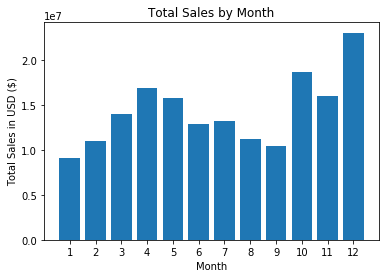

In [27]:
# ploting a graph to show the best month
import matplotlib.pyplot as plt

# group the data by month and sum the sales
monthly_sales = all_data.groupby('Month').sum()['Total Sales']

# create a list of months for the x-axis labels
months = range(1,13)

# create a bar chart
plt.bar(months, monthly_sales)

# add labels and title
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Total Sales in USD ($)')
plt.title('Total Sales by Month')

# show the plot
plt.show()


### Question 2: What city sold the most product

To find the city that sold the most product, we can group the data by city and then sum the quantity ordered and the total sales. We can then sort the data by the total sales to find the city that sold the most product.

In [21]:
city_sales = all_data.groupby('City').sum()[['Quantity Ordered', 'Total Sales']]

city_sales.sort_values('Total Sales', ascending=False, inplace=True)

city_sales.head(1)


,Quantity Ordered,Total Sales
City,,
San Francisco (CA),251195,4.131102e+07


In [22]:
# can also simply use a groupby and pick out the city 
all_data.groupby(['City']).sum()

,Month,Quantity Ordered,Price Each,Total Sales
City,,,,
Atlanta (GA),523970,83010,1.389954e+07,1.397749e+07
Austin (TX),349145,55765,9.049368e+06,9.097909e+06
Boston (MA),705560,112640,1.818705e+07,1.830821e+07
Dallas (TX),523100,83650,1.376314e+07,1.383988e+07
Los Angeles (CA),1041625,166445,2.710718e+07,2.726285e+07
New York City (NY),878705,139660,2.317685e+07,2.332159e+07
Portland (ME),85720,13750,2.235946e+06,2.248791e+06
Portland (OR),353105,56515,9.302791e+06,9.353662e+06
San Francisco (CA),1577600,251195,4.105731e+07,4.131102e+07


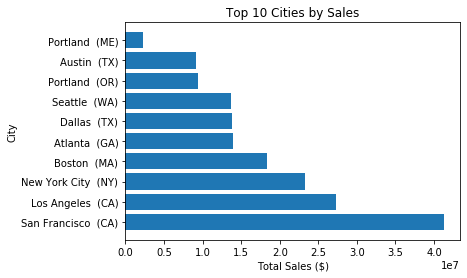

In [23]:
# graphical representation
import matplotlib.pyplot as plt

# Calculate total sales by city
city_sales = all_data.groupby('City')['Total Sales'].sum().sort_values(ascending=False)

# Get top 10 cities
top_cities = city_sales.head(10)

# Create horizontal bar chart
plt.barh(top_cities.index, top_cities.values)

# Set chart title and axis labels
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('City')

# Display the chart
plt.show()


### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

To answer this question, we need to analyze the data to determine at what time customers are more likely to make a purchase. We can extract the hour of the day from the "Order Date" column and then plot a bar chart to visualize the number of orders at each hour. This will give us an idea of the time of day when customers are most likely to buy a product.

In [24]:
# Extract the hour from the "Order Date" column
all_data['Order Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute

all_data.head()

,Order ID,Month,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Total Sales,Order Hour,Minute
0,176558,4,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX),23.90,8,46
2,176559,4,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA),99.99,22,30
3,176560,4,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),600.00,14,38
4,176560,4,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),11.99,14,38
5,176561,4,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),11.99,9,27


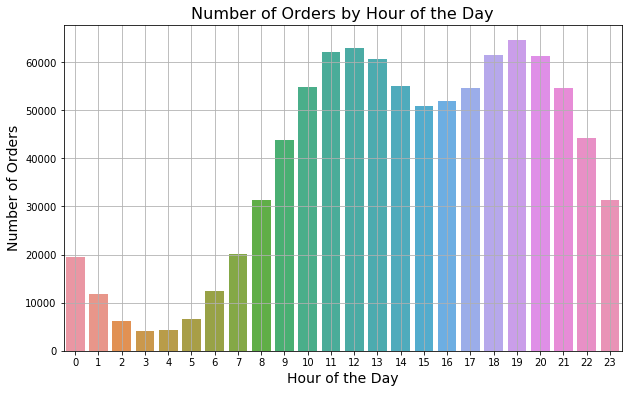

In [25]:
# Plot a bar chart of the number of orders at each hour
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='Order Hour', data=all_data)
plt.title('Number of Orders by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.grid()
plt.show()

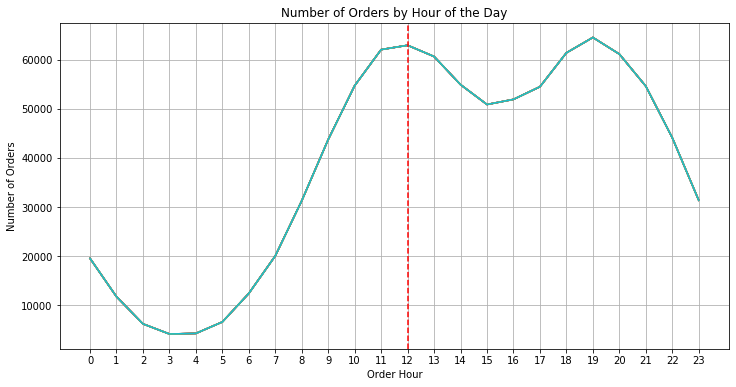

In [26]:
#line plot 

import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12,6))
hours = [hour for hour, df in all_data.groupby('Order Hour')]
plt.plot(hours, all_data.groupby(['Order Hour']).count())
plt.xticks(hours)
plt.grid()

# Add the line
plt.axvline(x=12, color='r', linestyle='--')

# Set the labels and title
plt.xlabel('Order Hour')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of the Day')

plt.show()


### Question 4: What products are most often sold together?

To determine which products are most often sold together, we can look at the Order ID column. If multiple rows share the same Order ID, it means they were part of the same order. We can group the rows by Order ID and then concatenate the Product column values for each group.

In [31]:
# Create a copy of the DataFrame to work with
df = all_data.copy()

# Add a column that combines Order ID and Product
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

# Drop duplicate orders
df = df[['Order ID', 'Grouped']].drop_duplicates()

# Count the frequency of product combinations and show the top 10
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    products = row.split(', ')
    count.update(Counter(combinations(products, 2)))

for key, value in count.most_common(10):
    print(key, value)


('USB-C Charging Cable', 'USB-C Charging Cable') 220230
('Lightning Charging Cable', 'Lightning Charging Cable') 217930
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 207610
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 206645
('Wired Headphones', 'Wired Headphones') 189695
('Apple Airpods Headphones', 'Apple Airpods Headphones') 156090
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 133925
('27in FHD Monitor', '27in FHD Monitor') 75295
('iPhone', 'iPhone') 68470
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 62425


###  Question 5: What product sold the most? Why do you think it sold the most?

To find the product that sold the most, we can group the data by the Product column and sum the Quantity Ordered column. We can then sort the resulting DataFrame in descending order of the Quantity Ordered column and take the first row to get the product that sold the most.

In [28]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

most_sold_product = quantity_ordered.sort_values(ascending=False).index[0]
print("The most sold product is:", most_sold_product)


The most sold product is: AAA Batteries (4-pack)


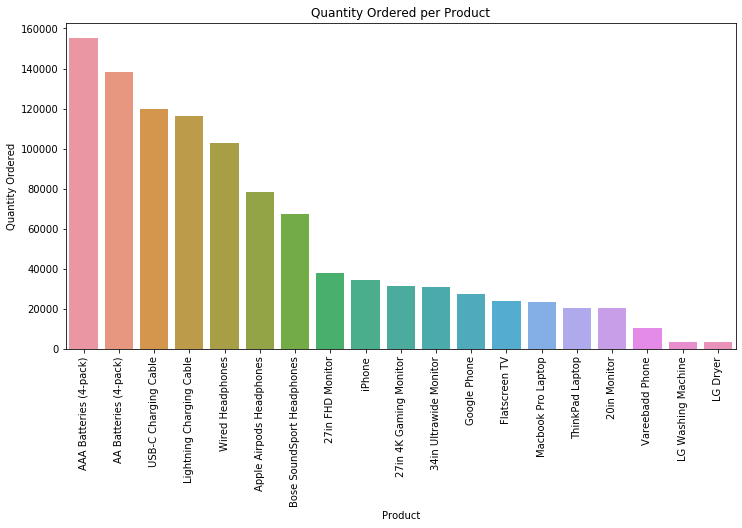

In [30]:
# graphical representation
import seaborn as sns


product_group = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
product_group = product_group.sort_values('Quantity Ordered', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Product', y='Quantity Ordered', data=product_group)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered per Product')
plt.show()